# DISCO PROJECT

In [20]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import zip_longest
import networkx as nx

In [21]:
#Reading Datasets
a=int(input("Enter dataset number: "))
df = pd.read_csv(f"data_set - Sheet{a}.csv")

In [22]:
#Changing Categories from X1, X2, X3 to 0.5, 1, 1.5 respectively
df.loc[df['CATEGORY'] == 'X1', 'CATEGORY'] = 0.5
df.loc[df['CATEGORY'] == 'X2', 'CATEGORY'] = 1
df.loc[df['CATEGORY'] == 'X3', 'CATEGORY'] = 1.5

In [23]:
#Assigning random ranks to the professors
random_ranks = np.random.permutation(np.arange(1, df.shape[0]+1))
df['Rank'] = random_ranks
df.sort_values('Rank',inplace=True)
df = df.reset_index(drop=True)
df.head(10)

,NAME,Rank,CATEGORY,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,Yosef,1,1.5,FDE3,HDC2,FDC8,HDE4,HDC4,FDC11,HDE2,FDC10,FDE1,FDC9
1,Daniel,2,1.5,FDC3,HDC1,FDC5,FDC2,FDE4,HDC4,FDC7,FDE2,HDE2,HDE1
2,Mason,3,1,FDE2,FDE3,FDC1,HDE4,FDC5,FDC4,HDC4,HDE3,FDC6,HDC1
3,Hannah,4,0.5,FDE4,HDC1,FDC10,FDC6,FDC1,FDE5,FDC4,HDE2,HDC2,HDE1
4,Aiden,5,0.5,FDE2,FDE5,FDC10,HDC2,HDC1,FDC2,HDE4,FDC11,FDC7,HDE1
5,Abdul,6,1.5,HDE3,FDE6,HDC3,FDC10,HDC2,FDC11,FDC9,FDC7,FDE5,HDE1
6,Bella,7,0.5,HDE1,HDC3,FDC4,FDC3,FDE4,FDC1,FDC6,FDE5,HDC2,HDE2
7,Gabriel,8,0.5,HDC2,FDE3,HDE1,HDE2,FDC11,FDC9,FDC8,FDE2,HDC4,FDC4
8,Lily,9,1,FDC8,FDE3,HDE2,FDC3,HDC4,FDC2,HDE4,FDE2,FDC4,HDC1
9,Xena,10,1.5,FDC8,HDC4,HDC3,FDC7,FDE3,HDE1,HDE2,FDC9,FDC10,FDE6


In [24]:
#Creating Course Dictionaries  with key-value which denotes course load as 1
FDC ={'FDC1': 1, 'FDC2': 1, 'FDC3': 1, 'FDC4': 1, 'FDC5': 1, 'FDC6': 1, 'FDC7': 1, 'FDC8': 1, 'FDC9': 1, 'FDC10': 1, 'FDC11': 1}
HDC={'HDC1': 1, 'HDC2': 1, 'HDC3': 1, 'HDC4': 1}
FDE = {'FDE1': 1, 'FDE2': 1, 'FDE3': 1, 'FDE4': 1, 'FDE5': 1, 'FDE6': 1}
HDE = {'HDE1': 1, 'HDE2': 1, 'HDE3': 1, 'HDE4': 1}

In [25]:
#Checking for any single occurrence of course in the dataset
test = {**FDC, **HDC}
only_once=[]
for key in test:
    occurrences = df.values.flatten().tolist().count(key)
    if(occurrences==1):
        only_once.append(key)

In [26]:
#Creating dictionary out of the given dataset
proff_dict={}
for i in range(df.shape[0]):
    proff_list=df.iloc[i].tolist()
    proff_dict[proff_list[0]]=proff_list[1:]
#print(proff_dict)

In [27]:
#Creating a dictionary with courses as key
allot_dict = {key: [] for key in set(FDC) | set(HDC) | set(FDE) | set(HDE)}

In [28]:
#Creating function for assigning course to a professor
def assign_course(prof_name,course_name):
    for i in allot_dict:
        if i==course_name:
            allot_dict[i].append(prof_name)    

In [29]:
#Creating function for cheaking if all argumented courses are completely assigned
def check_total(x):
    total=0
    for i in x:
        total+=x[i]
    if total==0:
        return True
    else:
        return False        

In [30]:
#If a course is only occurring once then it is assigned to the professor
for key in proff_dict:
    for once in only_once:
        if once in proff_dict[key] and proff_dict[key][1] in [1,1.5]:
            assign_course(key,once)
            proff_dict[key][1]-=1
            if once.startswith("FDC"):
                FDC[once]-=1
            elif once.startswith("HDC"):
                HDC[once]-=1

In [31]:
#Creating the algorithm which decides when to assign the course to the professor
def preference_priority(x):
    if x==FDC:
        y='FDC'
    elif x==HDC:
        y='HDC'
    elif x==FDE:
        y='FDE'
    elif x==HDE:
        y='HDE'
    
    for i in range(2,12):
        for name in proff_dict:
            if proff_dict[name][i].startswith(y):
                course_name=proff_dict[name][i]
                if course_name in x:
                    if x[course_name] in [0.5,1] and proff_dict[name][1] in [0.5,1.5]:
                        if proff_dict[name][1] in [0.5,1.5] and course_name not in only_once:
                            assign_course(name,course_name)
                            x[course_name]-=0.5
                            proff_dict[name][1]-=0.5
                        elif proff_dict[name][1]==1.5 and course_name in only_once:
                            assign_course(name,course_name)
                            x[course_name]-=1
                            proff_dict[name][1]-=1
                    elif x[course_name]==1 and proff_dict[name][1] in [1,1.5]:
                        assign_course(name,course_name)
                        x[course_name]=0
                        proff_dict[name][1]-=1
        if check_total(x):
            break

In [32]:
#Calling above function for all courses
preference_priority(FDC)
preference_priority(HDC)
preference_priority(FDE)
preference_priority(HDE)

In [33]:
# Wrting an algorithm which resets the course load to 1 if left 0.5 and de-assign the professor from the course
for key in FDC:
    if FDC[key]==0.5:
        FDC[key]+=0.5
        proff=allot_dict[key][0]
        allot_dict[key]=[]
        proff_dict[proff][1]+=0.5
for key in HDC:
    if HDC[key]==0.5:
        HDC[key]+=0.5
        proff=allot_dict[key][0]
        allot_dict[key]=[]
        proff_dict[proff][1]+=0.5
for key in FDE:
    if FDE[key]==0.5:
        FDE[key]+=0.5
        proff=allot_dict[key][0]
        allot_dict[key]=[]
        proff_dict[proff][1]+=0.5
for key in HDE:
    if HDE[key]==0.5:
        HDE[key]+=0.5
        proff=allot_dict[key][0]
        allot_dict[key]=[]
        proff_dict[proff][1]+=0.5

In [34]:
# Finding the required number of professors column
for i in range(len(allot_dict)):
    if len(list(allot_dict.items())[i][1])>1:
        max=1
        break
    else:
        max=0

In [35]:
# Creates a dataframe from the allot_dict
if max==1:
    df = pd.DataFrame(allot_dict.items(), columns=['Courses', 'Professors'])
    df[['Professor1', 'Professor2']] = pd.DataFrame(df['Professors'].tolist(),index=df.index)
    df = df.drop(columns='Professors')
    df
    def custom_sort(course):
        letters = course[:3]
        number = int(course[3:])
        category_order = {'FDC': 1, 'HDC': 2, 'FDE': 3, 'HDE': 4}
        return (category_order[letters], number)

    df['sort_key'] = df['Courses'].apply(custom_sort)
    df = df.sort_values('sort_key').drop(columns='sort_key')
    df = df.reset_index(drop=True)
else:
    df = pd.DataFrame(allot_dict.items(), columns=['Courses', 'Professors'])
    df['Professor1'] = pd.DataFrame(df['Professors'].tolist(),index=df.index)
    df = df.drop(columns='Professors')
    df
    def custom_sort(course):
        letters = course[:3]
        number = int(course[3:])
        category_order = {'FDC': 1, 'HDC': 2, 'FDE': 3, 'HDE': 4}
        return (category_order[letters], number)

    df['sort_key'] = df['Courses'].apply(custom_sort)
    df = df.sort_values('sort_key').drop(columns='sort_key')
    df = df.reset_index(drop=True) 

In [36]:
# Styles the dataframe and downloads output excel file
def red(x):
    if pd.isna(x):
        return 'font-weight: bold; color: red'
    else:
        return ''

styled_df = df.style.applymap(red)
styled_df.to_excel('styled_dataset.xlsx', index=False)
print("Outfile is downloaded")
styled_df


Outfile is downloaded


/tmp/ipykernel_1895691/1078314696.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(red)


,Courses,Professor1,Professor2
0,FDC1,Uriel,Sebastian
1,FDC2,Zari,Jasmine
2,FDC3,Daniel,Delilah
3,FDC4,Caleb,Bella
4,FDC5,Oliver,None
5,FDC6,Fiona,Hannah
6,FDC7,Ethan,Tessa
7,FDC8,Lily,None
8,FDC9,Kaden,None
9,FDC10,Donald,Mohar


/home/akshat_gosain/.local/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


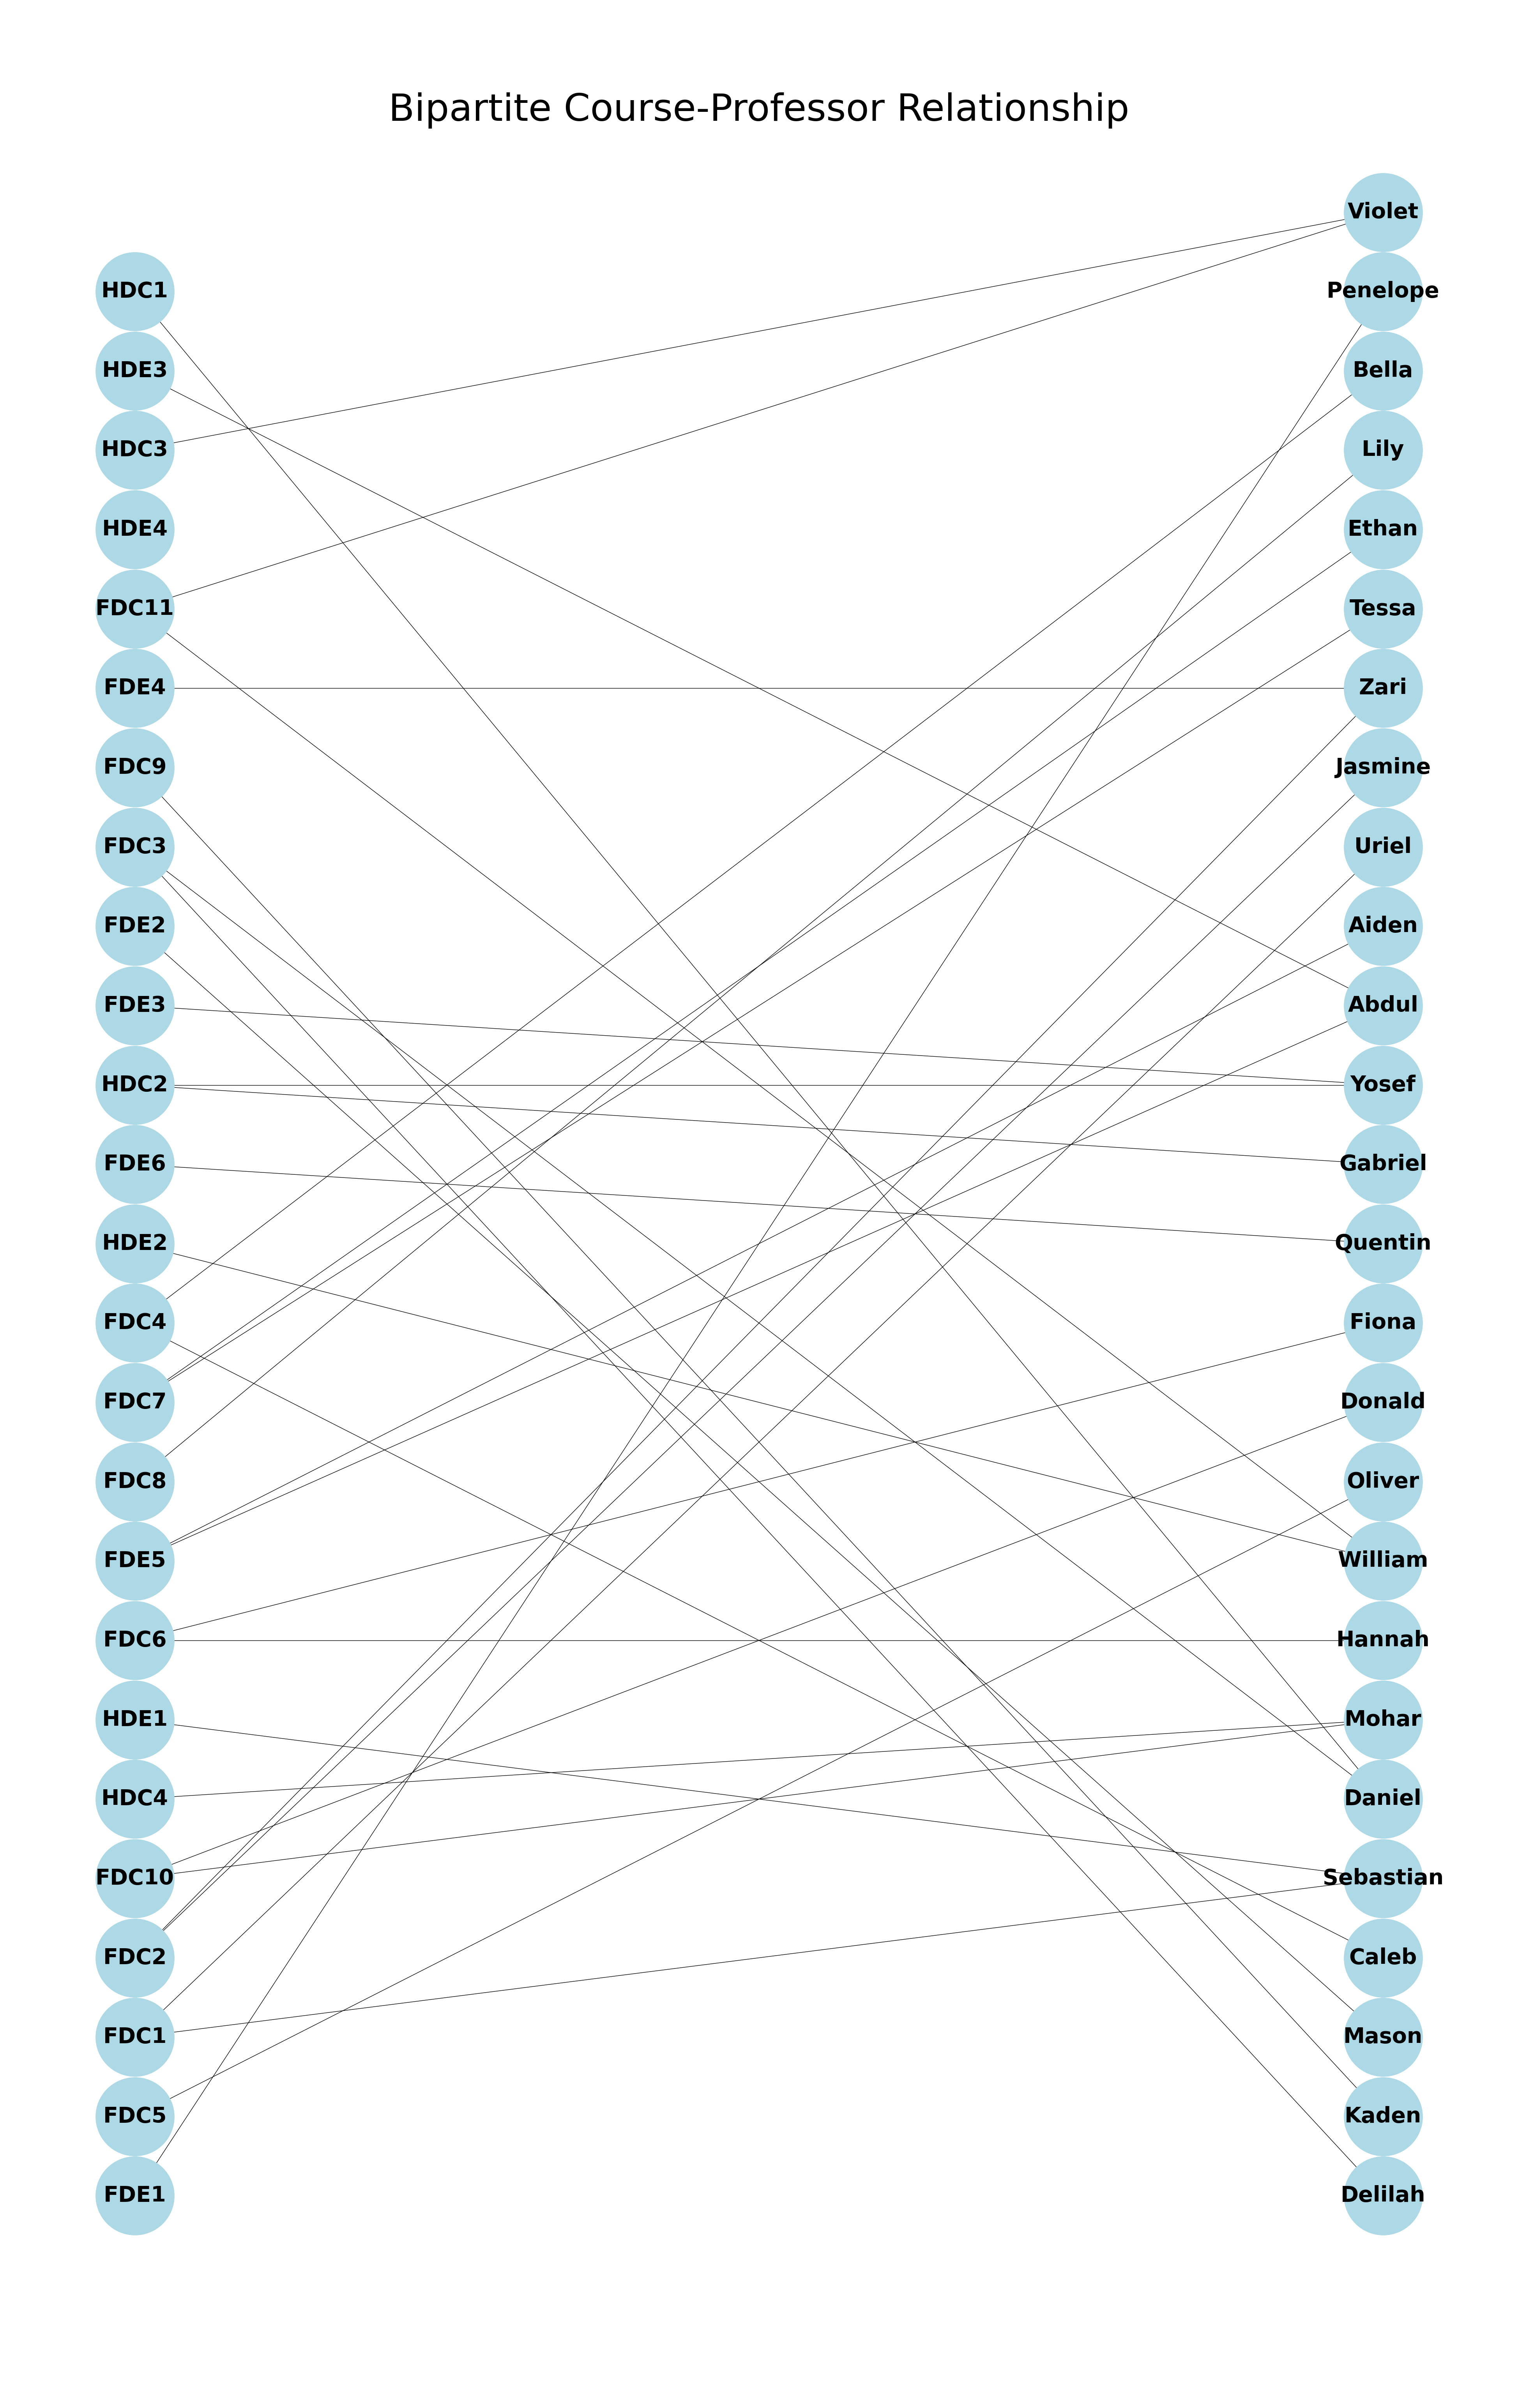

In [37]:
# Prepares a bipartite graph

# Your modified data
if df.shape[1]==2:
    # Use zip_longest to ensure equal length, filling with None
    zipped_data = zip_longest(df['Courses'], df['Professor1'])

    # Create DataFrame from zipped data
    df = pd.DataFrame(zipped_data, columns=['Courses', 'Professor1'])

    # Drop rows where 'Courses' is None
    df = df.dropna(subset=['Courses'])

    # Continue with the rest of the code for creating and plotting the bipartite graph

    # Create a list of edges (course, professor)
    edges = []
    for _, row in df.iterrows():
        course = row['Courses']
        professor1 = row['Professor1']

        if professor1 is not None:
            edges.append((course, professor1))

        

    # Create a bipartite graph
    B = nx.Graph()

    # Add nodes with the 'bipartite' attribute
    B.add_nodes_from(df['Courses'], bipartite=0)  # Courses
    B.add_nodes_from(df['Professor1'].dropna(), bipartite=1)  # Professors

    # Add edges to the bipartite graph
    B.add_edges_from(edges)

    # Separate nodes into two sets for bipartite layout
    courses = {node for node, bipartite in nx.get_node_attributes(B, 'bipartite').items() if bipartite == 0}
    professors = {node for node, bipartite in nx.get_node_attributes(B, 'bipartite').items() if bipartite == 1}

    # Compute bipartite layout
    pos = dict()
    pos.update((node, (1, index)) for index, node in enumerate(courses))
    pos.update((node, (2, index)) for index, node in enumerate(professors))

    # Create a new figure
    fig, ax = plt.subplots(figsize=(50, 80)) 
    # Plot the bipartite graph
    node_size = 21000
    nx.draw(B, pos, with_labels=True, font_size=40, node_size=node_size, node_color='lightblue', font_color='black',font_weight='bold',arrowsize=50, ax=ax)

    # Add a title to the plot
    ax.set_title("Bipartite Course-Professor Relationship",fontsize=70,y=0.95)
    print()
    print()
    # Display the plot
    plt.show()
else:
    # Use zip_longest to ensure equal length, filling with None
    zipped_data = zip_longest(df['Courses'], df['Professor1'], df['Professor2'])

    # Create DataFrame from zipped data
    df = pd.DataFrame(zipped_data, columns=['Courses', 'Professor1', 'Professor2'])

    # Drop rows where 'Courses' is None
    df = df.dropna(subset=['Courses'])

    # Continue with the rest of the code for creating and plotting the bipartite graph

    # Create a list of edges (course, professor)
    edges = []
    for _, row in df.iterrows():
        course = row['Courses']
        professor1 = row['Professor1']
        professor2 = row['Professor2']

        if professor1 is not None:
            edges.append((course, professor1))

        if professor2 is not None:
            edges.append((course, professor2))

    # Create a bipartite graph
    B = nx.Graph()

    # Add nodes with the 'bipartite' attribute
    B.add_nodes_from(df['Courses'], bipartite=0)  # Courses
    B.add_nodes_from(df['Professor1'].dropna(), bipartite=1)  # Professors
    B.add_nodes_from(df['Professor2'].dropna(), bipartite=1)  # Professors

    # Add edges to the bipartite graph
    B.add_edges_from(edges)

    # Separate nodes into two sets for bipartite layout
    courses = {node for node, bipartite in nx.get_node_attributes(B, 'bipartite').items() if bipartite == 0}
    professors = {node for node, bipartite in nx.get_node_attributes(B, 'bipartite').items() if bipartite == 1}

    # Compute bipartite layout
    pos = dict()
    pos.update((node, (1, index)) for index, node in enumerate(courses))
    pos.update((node, (2, index)) for index, node in enumerate(professors))

    # Create a new figure
    fig, ax = plt.subplots(figsize=(50, 80)) 
    # Plot the bipartite graph
    node_size = 21000
    nx.draw(B, pos, with_labels=True, font_size=40, node_size=node_size, node_color='lightblue', font_color='black',font_weight='bold',arrowsize=50, ax=ax)

    # Add a title to the plot
    ax.set_title("Bipartite Course-Professor Relationship",fontsize=70,y=0.95)
    print()
    print()
    # Display the plot
    plt.show()


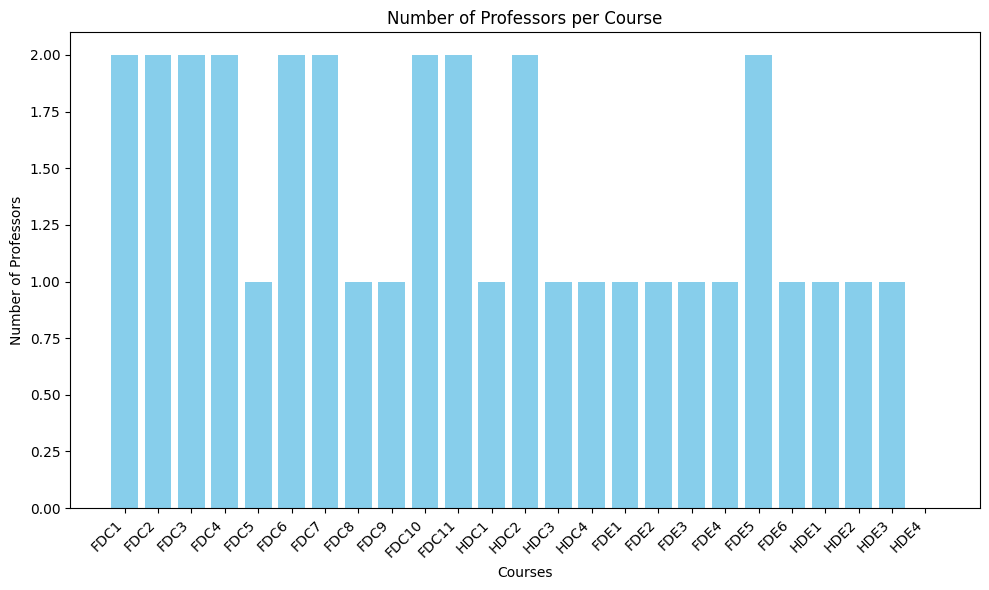

In [38]:
# Prepares a bar graph
if df.shape[1]==2:
    professor_counts = df[['Professor1']].count(axis=1)
    plt.figure(figsize=(10, 6))
    plt.bar(df['Courses'], professor_counts, color='skyblue')
    plt.xlabel('Courses')
    plt.ylabel('Number of Professors')
    plt.title('Number of Professors per Course')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    professor_counts = df[['Professor1', 'Professor2']].count(axis=1)
    plt.figure(figsize=(10, 6))
    plt.bar(df['Courses'], professor_counts, color='skyblue')
    plt.xlabel('Courses')
    plt.ylabel('Number of Professors')
    plt.title('Number of Professors per Course')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
